In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
df = pd.read_csv('./dataset.csv')

In [3]:
df['diff'] = df.actualWin - df.predictionWin

In [4]:
replace = {
    'Froskurinn': 'Froskurinn',
    'Jatt': 'Jatt',
    'Deficio': 'Other',
    'Yamatocanon': 'Other',
    'Papasmithy': 'Other'
}
df['normalized_predictor'] = [replace[x] for x in df['Predictor']]

In [12]:
df.head(n=10)

,Round,Predictor,Team,predictionWin,predictionLoss,actualWin,actualLoss,diff,normalized_predictor
0,Quarterfinals,Froskurinn,IG,1,3,3,2,2,Froskurinn
1,Quarterfinals,Froskurinn,KT,3,1,2,3,-1,Froskurinn
2,Quarterfinals,Deficio,IG,1,3,3,2,2,Other
3,Quarterfinals,Deficio,KT,3,1,2,3,-1,Other
4,Quarterfinals,Jatt,IG,1,3,3,2,2,Jatt
5,Quarterfinals,Jatt,KT,3,1,2,3,-1,Jatt
6,Quarterfinals,Froskurinn,RNG,3,1,2,3,-1,Froskurinn
7,Quarterfinals,Froskurinn,G2,1,3,3,2,2,Froskurinn
8,Quarterfinals,Deficio,RNG,3,1,2,3,-1,Other
9,Quarterfinals,Deficio,G2,1,3,3,2,2,Other


In [6]:
stats = df[['Team', 'diff']].groupby(['Team'], as_index=False).agg(['mean', 'std'])
stats.head(n=10)

diff          
          mean       std
Team                    
AFS  -2.666667  0.577350
C9   -0.166667  1.940790
EDG   0.333333  0.577350
FNC  -0.444444  1.424001
G2    0.166667  2.639444
IG    1.000000  0.866025
KT   -1.000000  0.000000
RNG  -1.000000  0.000000

In [72]:
stats_reset = stats.reset_index()
stats_reset

Team      diff          
            mean       std
0  AFS -2.666667  0.577350
1   C9 -0.166667  1.940790
2  EDG  0.333333  0.577350
3  FNC -0.444444  1.424001
4   G2  0.166667  2.639444
5   IG  1.000000  0.866025
6   KT -1.000000  0.000000
7  RNG -1.000000  0.000000

In [8]:
new_df = pd.DataFrame()

In [9]:
new_df['team'] = stats_reset['Team']

new_df['mean'] = stats_reset['diff']['mean']
new_df['std'] = stats_reset['diff']['std']
new_df

,team,mean,std
0,AFS,-2.666667,0.577350
1,C9,-0.166667,1.940790
2,EDG,0.333333,0.577350
3,FNC,-0.444444,1.424001
4,G2,0.166667,2.639444
5,IG,1.000000,0.866025
6,KT,-1.000000,0.000000
7,RNG,-1.000000,0.000000


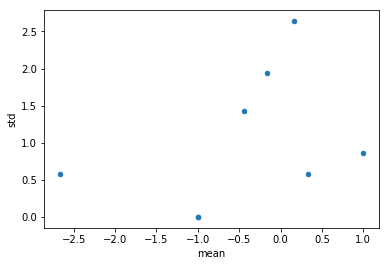

In [10]:
new_df.plot.scatter(x='mean', y='std')

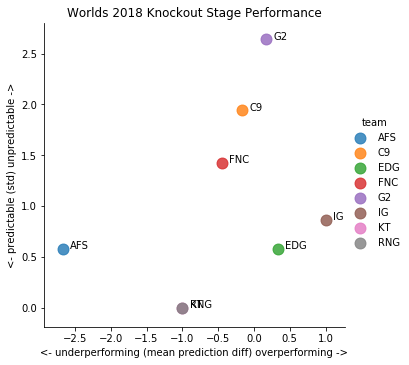

In [70]:
# sns.set_context('talk')

p1 = sns.lmplot(x='mean', y='std', hue='team', fit_reg=False, data=new_df, scatter_kws={"marker": "D", "s": 120})
plt.title("Worlds 2018 Knockout Stage Performance")
plt.xlabel("<- underperforming (mean prediction diff) overperforming ->")
plt.ylabel("<- predictable (std) unpredictable ->")

for index, row in new_df.iterrows():
    p1.ax.annotate(row['team'], (row['mean'] + 0.1, row['std']))

p1